In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [3]:
from olist.order import Order

In [4]:
orders = Order().get_training_data(with_distance_seller_customer=True)
orders.columns

Index(['order_id', 'wait_time', 'expected_wait_time', 'delay_vs_expected',
       'order_status', 'dim_is_five_star', 'dim_is_one_star', 'review_score',
       'number_of_products', 'number_of_sellers', 'price', 'freight_value',
       'distance_seller_customer'],
      dtype='object')

In [5]:
features = ['wait_time','delay_vs_expected', 'number_of_products', 'number_of_sellers', 'price', 'freight_value',
       'distance_seller_customer']

In [6]:
# Check for multi-colinearity by looking at Variance Inflation Factor (vif)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X = orders[features]
X

,wait_time,delay_vs_expected,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,8.436574,0.0,1,1,29.99,8.72,18.063837
1,13.782037,0.0,1,1,118.70,22.76,856.292580
2,9.394213,0.0,1,1,159.90,19.22,514.130333
3,13.208750,0.0,1,1,45.00,27.20,1822.800366
4,2.873877,0.0,1,1,19.90,8.72,30.174037
...,...,...,...,...,...,...,...
96528,8.218009,0.0,1,1,72.00,13.08,69.481037
96529,22.193727,0.0,1,1,174.90,20.10,474.098245
96530,24.859421,0.0,1,1,205.99,65.02,968.051192
96531,17.086424,0.0,2,1,359.98,81.18,370.146853


In [9]:
df = pd.DataFrame()
df['vif_index'] = [vif(X.values, i) for i in range(X.shape[1])]
df['features'] = X.columns
df

,vif_index,features
0,6.952775,wait_time
1,2.263424,delay_vs_expected
2,7.503118,number_of_products
3,9.005285,number_of_sellers
4,1.726152,price
5,3.535407,freight_value
6,2.909521,distance_seller_customer


In [10]:
# Fitting 2 LOGIT models (logit_one and logit_five) to predict dim_is_one_star and dim_is_five_star
logit_one = smf.logit(formula='dim_is_one_star ~' + ' + '.join(features), data=orders).fit()
print(logit_one.summary())

Optimization terminated successfully.
         Current function value: 0.279534
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        dim_is_one_star   No. Observations:                96525
Model:                          Logit   Df Residuals:                    96517
Method:                           MLE   Df Model:                            7
Date:                Sat, 24 Jul 2021   Pseudo R-squ.:                  0.1436
Time:                        15:29:25   Log-Likelihood:                -26982.
converged:                       True   LL-Null:                       -31505.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -5.2216      0.070    -74.975      0.000      -5.358

In [12]:
logit_five = smf.logit(formula='dim_is_five_star ~' + ' + '.join(features), data=orders).fit()
print(logit_five.summary())

Optimization terminated successfully.
         Current function value: 0.637337
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       dim_is_five_star   No. Observations:                96525
Model:                          Logit   Df Residuals:                    96517
Method:                           MLE   Df Model:                            7
Date:                Sat, 24 Jul 2021   Pseudo R-squ.:                 0.05890
Time:                        15:36:18   Log-Likelihood:                -61519.
converged:                       True   LL-Null:                       -65370.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.4490      0.064     38.138      0.000       2.323

In [14]:
#Compare against Ordinary Least Squares (OLS) Regression 
linear_model = smf.ols(formula='review_score ~' + ' + '.join(features), data=orders).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2348.
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:43:01   Log-Likelihood:            -1.5446e+05
No. Observations:               96525   AIC:                         3.089e+05
Df Residuals:                   96517   BIC:                         3.090e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

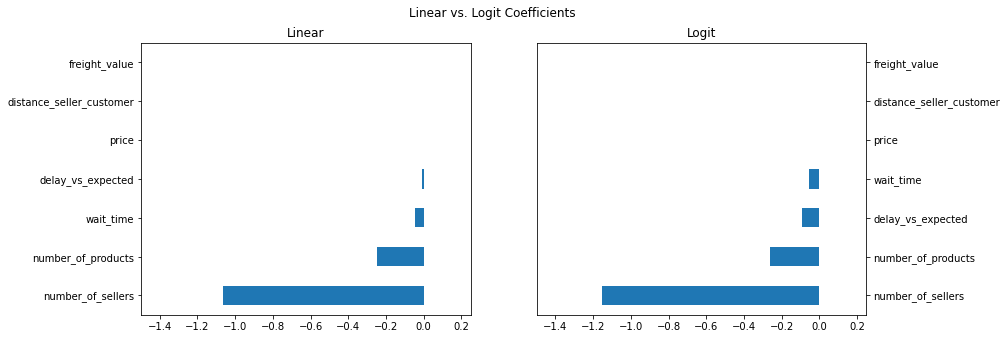

In [19]:
plt.figure(figsize=(13,5))
plt.suptitle('Linear vs. Logit Coefficients')
ax1 = plt.subplot(1,2,1)
ax1.set_title('Linear')
ax1.set_xlim(-1.5, 0.25)
linear_model.params[1:].sort_values().plot(kind='barh', ax=ax1)

ax2 = plt.subplot(1,2,2)
ax2.set_title('Logit')
ax2.yaxis.tick_right()
ax2.set_xlim(-1.5, 0.25)
logit_five.params[1:].sort_values().plot(kind='barh', ax=ax2)

plt.show()



In [ ]:
# According to the R-squared,roughly 14% of the variance can be explained from the selected features